## Data Preparation


In [1]:
# To import all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import warnings

# To ignore or hide all the warnings
warnings.filterwarnings('ignore');

In [2]:
# To load the training dataset into a pandas dataFrame
emp_train_df = pd.read_csv(r'C:\Users\Gazal V\Desktop\Ai and machine learning\train_LZdllcl.csv')
emp_test_df = pd.read_csv(r'C:\Users\Gazal V\Desktop\Ai and machine learning\test_2umaH9m.csv')

# To add is_test_set column in training dataset to identify the type of dataset
emp_train_df['is_test_set']=0

# To add is_train_test column in test dataset
emp_test_df['is_test_set']=1

# To add is_promoted column in test dataset
emp_test_df['is_promoted']=np.nan

In [3]:
# To see columns of train dataset
emp_train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'is_test_set'],
      dtype='object')

In [4]:
# To change sequence of columns to match as that from test dataset column sequence
emp_train_df = emp_train_df[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_test_set', 'is_promoted']]

In [5]:
# Let's have a look at first few records of train dataset
emp_train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [6]:
# To see columns of test dataset
emp_test_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_test_set', 'is_promoted'],
      dtype='object')

In [7]:
# Let's have a look at first few records of test dataset
emp_test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,1,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,1,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,1,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,1,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,1,NaN


In [8]:
# Combining train and test data using pandas
emp_df = emp_train_df.append(emp_test_df)

In [9]:
emp_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_test_set', 'is_promoted'],
      dtype='object')

In [10]:
# High level statistics of the dataset 

# To check the number of datapoints and number of attributes or features available in the training dataset
print(emp_train_df.shape) 

(54808, 15)


In [11]:
# High level statistics of the dataset 

# To check the number of datapoints and number of attributes or features available in the test dataset
print(emp_test_df.shape) 

(23490, 15)


In [12]:
# High level statistics of the dataset 

# To check the number of datapoints and number of attributes or features available in the merged dataset
print(emp_df.shape) 

(78298, 15)


**Observation(s):**
* Number of datapoints: 78298
* Number of features or attributes: 15

In [13]:
# To see column names in the dataset
print(emp_df.columns)

# To see first few data points in the dataset
emp_df.head()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_test_set', 'is_promoted'],
      dtype='object')


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [14]:
# check the data frame info
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_test_set           78298 non-null  int64  
 14  is_promoted           54808 non-null  float64
dtypes: float64(2), int6

In [15]:
# Let's have look at the different column values
emp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,78298.0,39149.500000,22602.830026,1.0,19575.25,39149.5,58723.75,78298.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.00,1.0,1.00,10.0
age,78298.0,34.797619,7.665928,20.0,29.00,33.0,39.00,60.0
previous_year_rating,72362.0,3.332219,1.260982,1.0,3.00,3.0,4.00,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.00,5.0,7.00,37.0
KPIs_met >80%,78298.0,0.354032,0.478222,0.0,0.00,0.0,1.00,1.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.00,0.0,0.00,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.00,60.0,76.00,99.0
is_test_set,78298.0,0.300008,0.458264,0.0,0.00,0.0,1.00,1.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.00,1.0


**Observation(s):**
* no_of_trainings range between 1 to 10
* age of employee range from 20 to 60
* An employee maximum survived for 37 years
* KPI is either 1 or 0 where 1 indicates an employee Percent of KPIs >80% otherwise 0
* awards_won = 1 means an employee was awarded during previous year otherwise 0
* Average score in current training evaluations range between 39 to 99
* is_test_test, here 1 indicate the record belong to test dataset, and 0 indicates the record belong to train dataset
* The previous_year_rating attribute has 4124 missing values in the dataset   

In [16]:
# To check duplicate employee_id values if any
emp_df[emp_df.duplicated(['employee_id'], keep=False)] #No duplicate employee_id found

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted


In [17]:
# To check distinct values for different attributes
print("Department:\n{0}\n\nRegion:\n{1}\n\nEducation:\n{2}\n\nGender:\n{3}\n\nRecruitment_channel:\n{4}\n\nno_of_trainings:\n{5}\n\nAge:\n{6}\n\nprevious_year_rating:\n{7}\n\nlength_of_service:\n{8}\n\nKPIs_met >80%:\n{9}\n\nawards_won?:\n{10}\n\navg_training_score:\n{11}\n\nis_promoted:\n{12}\n\n"\
      .format(emp_df["department"].unique(),sorted(emp_df["region"].unique()),emp_df["education"].unique(),emp_df["gender"].unique(),emp_df["recruitment_channel"].unique(),sorted(emp_df["no_of_trainings"].unique()),sorted(emp_df["age"].unique()),sorted(emp_df["previous_year_rating"].unique()),sorted(emp_df["length_of_service"].unique()),emp_df["KPIs_met >80%"].unique(),emp_df["awards_won?"].unique(),sorted(emp_df["avg_training_score"].unique()),emp_df["is_promoted"].unique())); 

Department:
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Region:
['region_1', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 'region_19', 'region_2', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_3', 'region_30', 'region_31', 'region_32', 'region_33', 'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9']

Education:
["Master's & above" "Bachelor's" nan 'Below Secondary']

Gender:
['f' 'm']

Recruitment_channel:
['sourcing' 'other' 'referred']

no_of_trainings:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Age:
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

previous_year_rating:
[1.0, 2.0, 3.0, 4.0, 5.0, nan]

length_of_service:
[1, 2

**Observation(s):**
* There are only two columns having NaN values which are: education and previous_year_rating

In [18]:
# To check count of nan values in each column of trating dataset

#count_nan = len(emp_df) - emp_df.count()
#count_nan

emp_df.isnull().sum(axis = 0)

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_test_set                 0
is_promoted             23490
dtype: int64

**Observation(s):**
* education column has 3443 nan values
* previous_year_rating column has 5936 nan values
* We will assign the predicted value(0,1) for is_promoted for the test dataset once the final model has been created

In [19]:
# To replace the nan values with zero for easy manupulation
emp_df['education']=emp_df['education'].fillna('Not_Known')

# To replace the previous_year_rating : nan values with 2 (taking average rating) for easy data manupulation
emp_df['previous_year_rating']=emp_df['previous_year_rating'].fillna(2)

emp_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [20]:
# To check number of classes in is_promoted
emp_df["is_promoted"].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

**Observation(s):**
* There are 4668 employee eligible for promotion in the training dataset.

In [21]:
# Let's classify the data based on is_promoted status
promoted = emp_df[emp_df["is_promoted"]==1];
not_promoted = emp_df[emp_df["is_promoted"]==0];

In [22]:
# To verify the above classified variables value looking into first few records
print("Employees eligible for promotion:")
promoted.head()

Employees eligible for promotion:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,0,1.0
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,0,1.0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,0,1.0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,2.0,1,1,1,58,0,1.0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,2.0,1,0,0,61,0,1.0


In [23]:
print("\n\nEmployees not eligible for promotion:")
not_promoted.head()



Employees not eligible for promotion:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [24]:
# To remove region column values prefiex as below
emp_df['region'] = emp_df['region'].str.replace('region_','')
#df['range'].str.replace(',','-')
emp_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [25]:
# Creating dummy variables for categorical datatypes
emp_df_dummies = pd.get_dummies(emp_df, columns=['department','region','education','recruitment_channel'])
emp_df_dummies.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,...,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Not_Known,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,f,1,35,5.0,8,1,0,49,0,...,1,0,0,0,0,1,0,0,0,1
1,65141,m,1,30,5.0,4,0,0,60,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,m,1,34,3.0,7,0,0,50,0,...,0,0,0,1,0,0,0,0,0,1
3,2542,m,2,39,1.0,10,0,0,50,0,...,0,0,0,1,0,0,0,1,0,0
4,48945,m,1,45,3.0,2,0,0,73,0,...,0,0,0,1,0,0,0,1,0,0


In [26]:
# To replace gender categorical variable value as 1 for 'm' and 0 for 'f'
gender_mapping = {'m': 1, 'f': 0}
emp_df_dummies['gender'] = emp_df['gender'].map(gender_mapping) 
emp_df_dummies.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,...,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Not_Known,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,1,0,0,0,0,1,0,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,1,0,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,1,0,0,0,1,0,0


##  Exploratory Data Analysis

###  Univaraite Analysis

### Plotting using PDF and CDF values

[0.01306769 0.1206084  0.26478149 0.25385604 0.15788346 0.08547558
 0.04027421 0.03041988 0.01799486 0.01563839]
[20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60.]
[0.01613482 0.1289988  0.24960112 0.2262864  0.15083765 0.09361787
 0.05331073 0.03522138 0.02469087 0.02130036]
[20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60.]


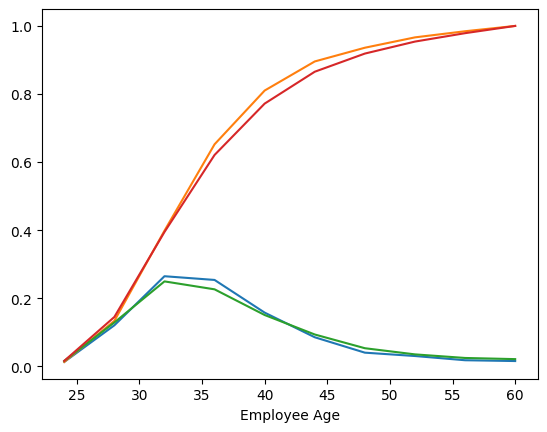

In [27]:
#Probability Density Functions (PDF)
#Cumulative Distribution Function (CDF)

##Let's Plots for PDF and CDF of age for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["age"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["age"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")

plt.xlabel("Employee Age") 

plt.show()


** Observation(s)**
* No significant information can be derived due to huge overlappling

[0.4667952  0.28706084 0.1503856  0.05184233 0.0235647  0.01435304
 0.00364182 0.00064267 0.00107112 0.00064267]
[ 1.   4.3  7.6 10.9 14.2 17.5 20.8 24.1 27.4 30.7 34. ]
[4.57140008e-01 3.46848823e-01 1.03889110e-01 4.85440766e-02
 2.55285201e-02 1.08496211e-02 4.34782609e-03 1.79497407e-03
 9.77263662e-04 7.97766254e-05]
[ 1.   4.6  8.2 11.8 15.4 19.  22.6 26.2 29.8 33.4 37. ]


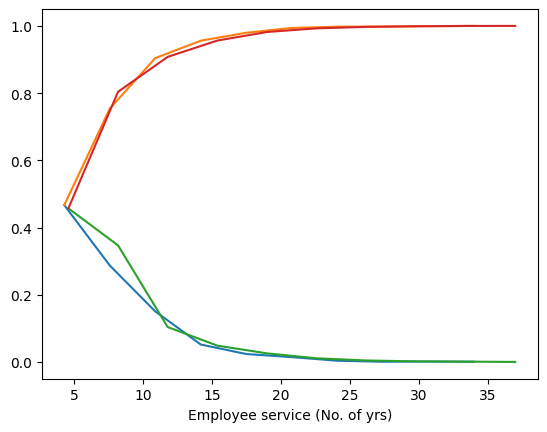

In [28]:
##Let's Plots for PDF and CDF of length_of_service for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["length_of_service"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["length_of_service"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")
plt.xlabel("Employee service (No. of yrs)") 

plt.show()


** Observation(s)**
* No significant information can be derived due to huge overlappling

[8.37617823e-01 0.00000000e+00 1.29605827e-01 0.00000000e+00
 2.61353899e-02 0.00000000e+00 5.56983719e-03 0.00000000e+00
 6.42673522e-04 4.28449015e-04]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
[8.07100120e-01 1.47227762e-01 3.29876346e-02 8.81531711e-03
 2.49301955e-03 8.37654567e-04 2.39329876e-04 9.97207818e-05
 9.97207818e-05 9.97207818e-05]
[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]


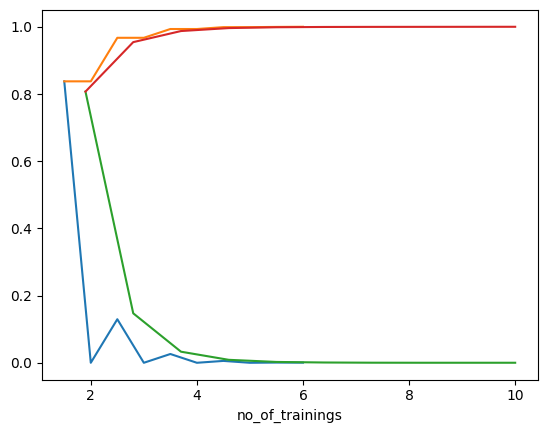

In [29]:
##Let's Plots for PDF and CDF of no_of_trainings for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["no_of_trainings"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["no_of_trainings"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")
plt.xlabel("no_of_trainings") 

plt.show()


** Observation(s)**
* No significant information can be derived

[0.30119966 0.         0.         0.         0.         0.
 0.         0.         0.         0.69880034]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.68031512 0.         0.         0.         0.         0.
 0.         0.         0.         0.31968488]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


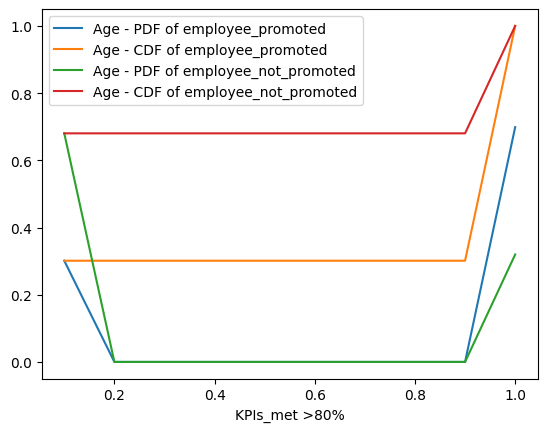

In [30]:
##Let's Plots for PDF and CDF of KPIs_met >80% for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["KPIs_met >80%"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["KPIs_met >80%"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")
plt.legend(loc = "upper left")
plt.xlabel("KPIs_met >80%") 

plt.show()


** Observation(s)**
* No significant information can be derived

[0.01885176 0.         0.11139674 0.         0.         0.29027421
 0.         0.16795201 0.         0.41152528]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 5. ]
[0.1223574  0.         0.1561428  0.         0.         0.34429597
 0.         0.18135221 0.         0.19585162]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 5. ]


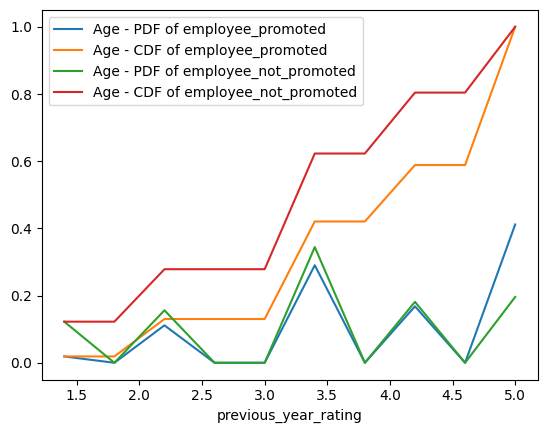

In [31]:
##Let's Plots for PDF and CDF of previous_year_rating for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["previous_year_rating"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["previous_year_rating"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")
plt.legend(loc = "upper left")
plt.xlabel("previous_year_rating") 

plt.show()


** Observation(s)**
* No significant information can be derived due to huge overlapping of pdf

[0.8802485 0.        0.        0.        0.        0.        0.
 0.        0.        0.1197515]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.9858197 0.        0.        0.        0.        0.        0.
 0.        0.        0.0141803]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


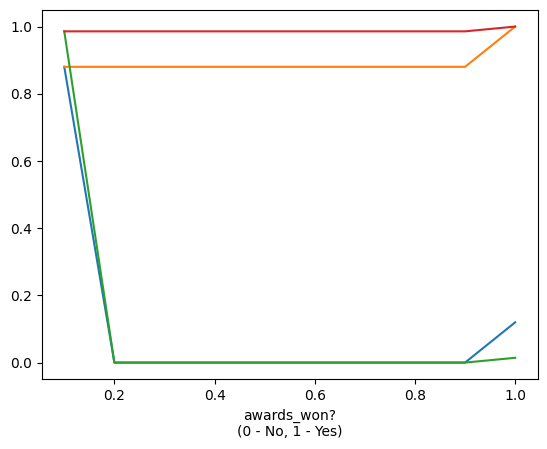

In [32]:
##Let's Plots for PDF and CDF of awards_won for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["awards_won?"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["awards_won?"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")
plt.xlabel("awards_won?\n(0 - No, 1 - Yes)") 

plt.show()


** Observation(s)**
* No significant information can be derived

[0.01863753 0.12039417 0.09018852 0.15445587 0.07819195 0.10689803
 0.11846615 0.15145673 0.10218509 0.05912596]
[41.  46.8 52.6 58.4 64.2 70.  75.8 81.6 87.4 93.2 99. ]
[0.01168728 0.2182489  0.16118867 0.17534902 0.09178301 0.09184284
 0.05303151 0.1353211  0.06013163 0.00141604]
[39.  44.7 50.4 56.1 61.8 67.5 73.2 78.9 84.6 90.3 96. ]


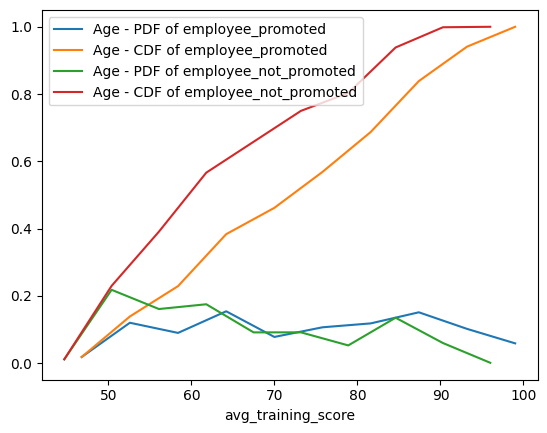

In [33]:
#Probability Density Functions (PDF)
#Cumulative Distribution Function (CDF)

##Let's Plots for PDF and CDF of avg_training_score for all employee.
#For employee who got promotion
counts, bin_edges = np.histogram(promoted["avg_training_score"], bins=10, density=True) #bin='auto'
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_promoted") 

#For employee who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["avg_training_score"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Age - PDF of employee_not_promoted")
plt.plot(bin_edges[1:],cdf, label="Age - CDF of employee_not_promoted")
plt.legend(loc = "upper left")
plt.xlabel("avg_training_score") 

plt.show()

** Observation(s)**
* No significant information can be derived

###  Box plot and Whiskers

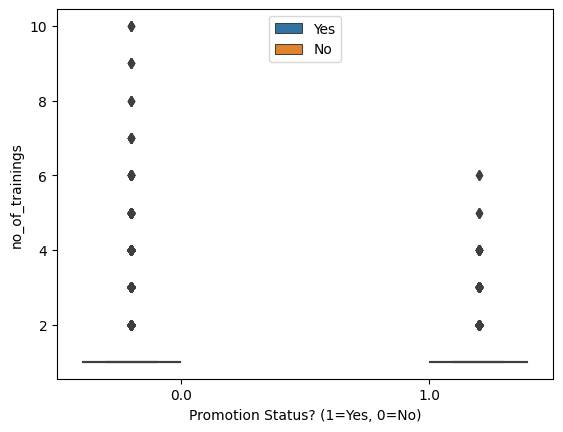

In [34]:
## Box-plot for no_of_trainings
ax = sbn.boxplot(x="is_promoted", y="no_of_trainings", hue = "is_promoted", data=emp_df)  
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Yes", "No"], loc = "upper center")
plt.xlabel("Promotion Status? (1=Yes, 0=No)") 
plt.ylabel("no_of_trainings") 
plt.show()

** Observation(s)**
* No significant information could be derived

###  Violin Plots

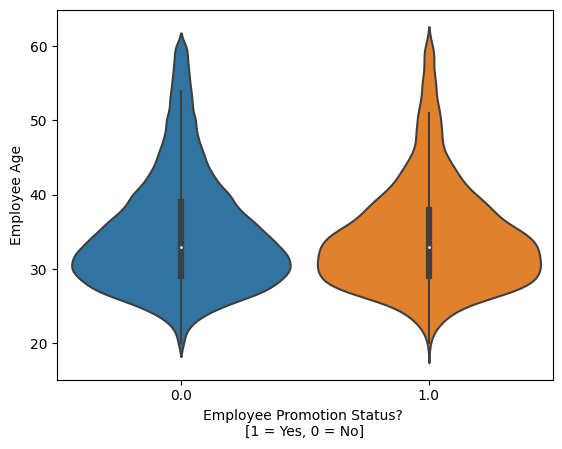

In [35]:
### A violin plot combines the benefits of Box-plot and PDF
#Let's have a look at employee age wise Violin Plot
sbn.violinplot(x="is_promoted", y="age", data=emp_df, width=0.9)
plt.xlabel("Employee Promotion Status? \n[1 = Yes, 0 = No]") 
plt.ylabel("Employee Age") 
plt.show()

** Observation(s)**
* Some employee b/w age 45-50 yrs have more chances to not being promoted

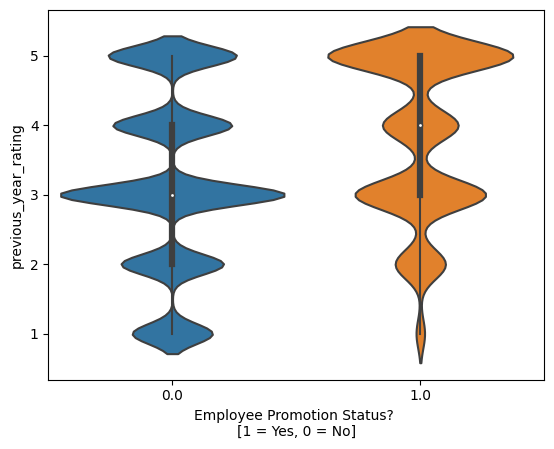

In [36]:
#Let's have a look at employee previous_year_rating wise Violin Plot
sbn.violinplot(x="is_promoted", y="previous_year_rating", data=emp_df, width=0.9)
plt.xlabel("Employee Promotion Status? \n[1 = Yes, 0 = No]") 
plt.ylabel("previous_year_rating") 
plt.show()

** Observation(s)**
* Employee with previous year rating as 3 or 5 has more chances being promoted
* Employee with previous year rating as 1,2, or 4 has more chances NOT being promoted

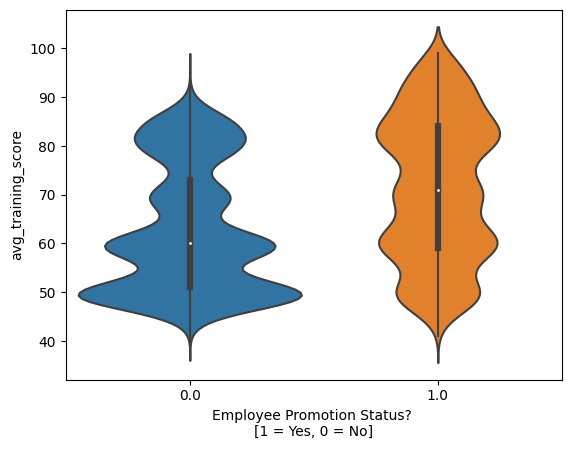

In [37]:
#Let's have a look at employee avg_training_score wise Violin Plot
sbn.violinplot(x="is_promoted", y="avg_training_score", data=emp_df, width=0.9)
plt.xlabel("Employee Promotion Status? \n[1 = Yes, 0 = No]") 
plt.ylabel("avg_training_score") 
plt.show()

** Observation(s)**
* Employee with avg_training_score > 85 definitely gets promoted
* Employee with avg_training_score b/w 46-54 and b/w 59-61 has more chances NOT being promoted

### Bi-varaite Analysis

### Pair-plot

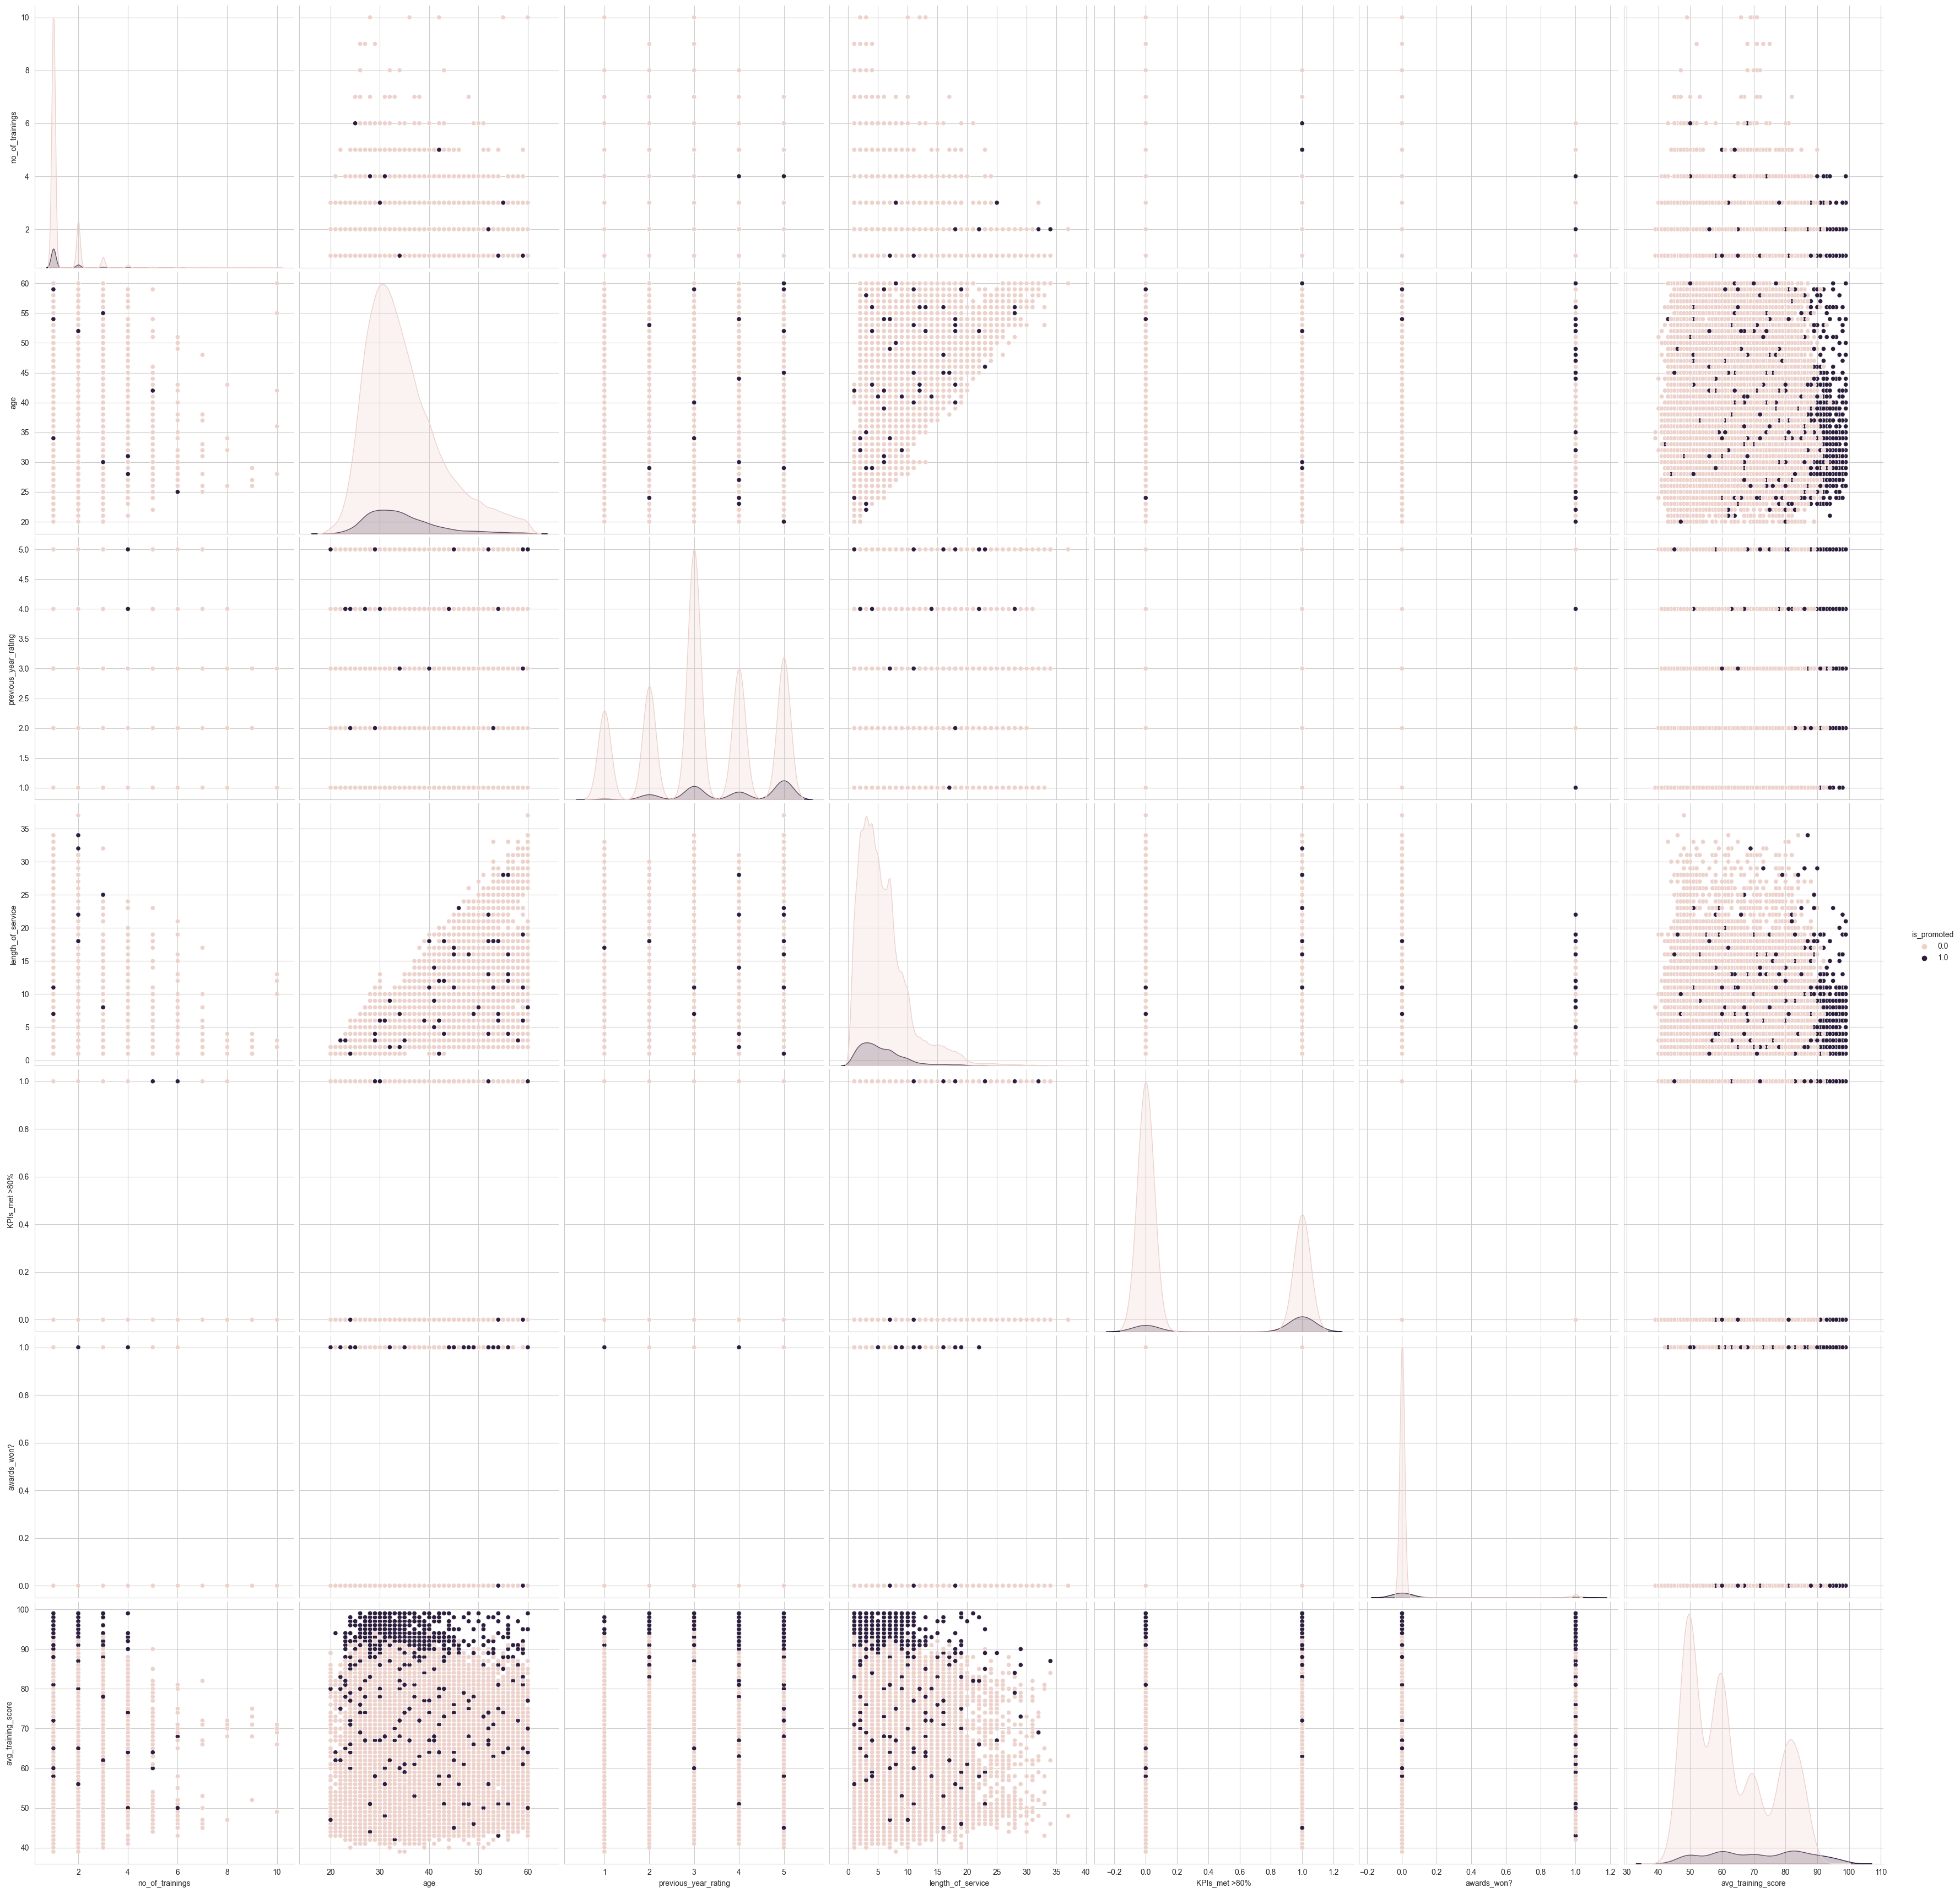

In [38]:
# Let's see all the possible combination using pair plot
plt.close();
sbn.set_style("whitegrid"); #white, dark, whitegrid, darkgrid, ticks
sbn.pairplot(emp_df, hue="is_promoted", vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', \
                                              'KPIs_met >80%', 'awards_won?', 'avg_training_score'], size=5);
plt.show();

** Observation(s)**
* length_of_service, age, avg_training_score, no_of_trainings are more important variables.
* Employee with length_of_service b/w 1-8 and avg_training_score > 45 has more chances to get promoted

### 4.2.3. Histogram (with PDF)

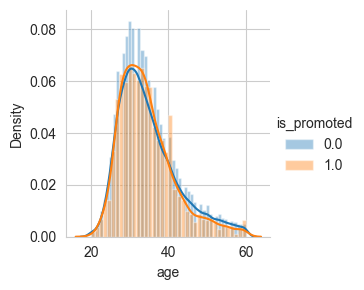

In [39]:
#Employee Age wise Promotion status
sbn.FacetGrid(emp_df, hue="is_promoted")\
   .map(sbn.distplot, "age")\
   .add_legend();

plt.show();

** Observation(s)**
* Employee b/w age 33-36 has more promotion chances

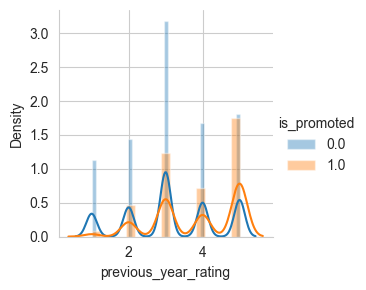

In [40]:
#Employee previous_year_rating wise Promotion status
sbn.FacetGrid(emp_df, hue="is_promoted")\
   .map(sbn.distplot, "previous_year_rating")\
   .add_legend();

plt.show();

** Observation(s)**
* Employee with rating 5 has high chance of promotion

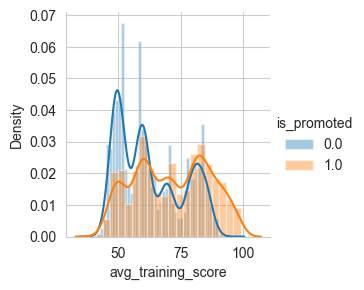

In [41]:
#Employee avg_training_score wise Promotion status
sbn.FacetGrid(emp_df, hue="is_promoted")\
   .map(sbn.distplot, "avg_training_score")\
   .add_legend();

plt.show();

** Observation(s)**
* Employee with avg_training_score b/w 45-55 has less chance of promotion
* Employee with avg_training_score > 85 has more chance of promotion

## Data cleanup


In [42]:
# To change the data type of previous_year_rating as int
emp_df_dummies[['previous_year_rating']] = emp_df_dummies[['previous_year_rating']].astype(int) 

In [43]:
# To validate the data types of all the variables
emp_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   gender                        78298 non-null  int64  
 2   no_of_trainings               78298 non-null  int64  
 3   age                           78298 non-null  int64  
 4   previous_year_rating          78298 non-null  int32  
 5   length_of_service             78298 non-null  int64  
 6   KPIs_met >80%                 78298 non-null  int64  
 7   awards_won?                   78298 non-null  int64  
 8   avg_training_score            78298 non-null  int64  
 9   is_test_set                   78298 non-null  int64  
 10  is_promoted                   54808 non-null  float64
 11  department_Analytics          78298 non-null  uint8  
 12  department_Finance            78298 non-null  uint8  
 13  d

In [44]:
#To see the total number of columns in final dataframe
len(emp_df_dummies.columns)

61

In [45]:
# To check the all column names
emp_df_dummies.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_test_set', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33', 'region_34',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's 

In [46]:
# To change the sequence of columns and store the data points into final_df

final_df = emp_df_dummies[['gender', 'no_of_trainings', 'age', \
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%', \
       'awards_won?', 'avg_training_score', \
       'department_Analytics', 'department_Finance', 'department_HR', \
       'department_Legal', 'department_Operations', 'department_Procurement', \
       'department_R&D', 'department_Sales & Marketing', 'department_Technology', \
       'region_1', 'region_2', 'region_3', 'region_4', 'region_5', \
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', \
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16', \
       'region_17', 'region_18', 'region_19', 'region_20', \
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25', \
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30', \
       'region_31', 'region_32', 'region_33', 'region_34', \
       'education_Below Secondary', 'education_Bachelor\'s', \
       'education_Master\'s & above', 'education_Not_Known', \
       'recruitment_channel_referred', 'recruitment_channel_sourcing', \
       'recruitment_channel_other', 'is_test_set', 'is_promoted']];

In [47]:
final_df.columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'region_1',
       'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'region_8', 'region_9', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_30', 'region_31', 'region_32',
       'region_33', 'region_34', 'education_Below Secondary',
       'education_Bachelor's', 'education_Master's & above',
       'education_Not_Known', 'recruitment

In [48]:
len(final_df.columns)

60

## Model Building and Evaluation


In [49]:
# Let's divide final_df into train and test dataset
train = final_df[final_df["is_test_set"] == 0]
test = final_df[final_df["is_test_set"] == 1]

# Remove is_test_set column from both train and test
del train['is_test_set']
del test['is_test_set']

# To check location of dependent variable/column
train.columns.get_loc("is_promoted")

58

In [50]:
# Assigning default value as Zero for now to test dataset for is_promoted column
test['is_promoted'] = 0.0

array = train.values
X_train = array[:,0:58] 
Y_train = array[:,58]

test_array = test.values
X_test = test_array[:,0:58] 
Y_test = test_array[:,58]

In [51]:
# To set test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.921526 (0.002983)
LDA: 0.933860 (0.002835)
KNN: 0.922712 (0.002750)
CART: 0.899011 (0.003449)
NB: 0.535014 (0.054583)
QDA: 0.623544 (0.159738)


** Observation **

**Accurecy**
LR: 0.931743 (0.003295)
LDA: 0.933915 (0.002671)
KNN: 0.921708 (0.003300)
CART: 0.898226 (0.003911)
NB: 0.533317 (0.049943)
QDA: 0.680213 (0.179284)

* We can see that it looks like LDA has the largest estimated accuracy score.

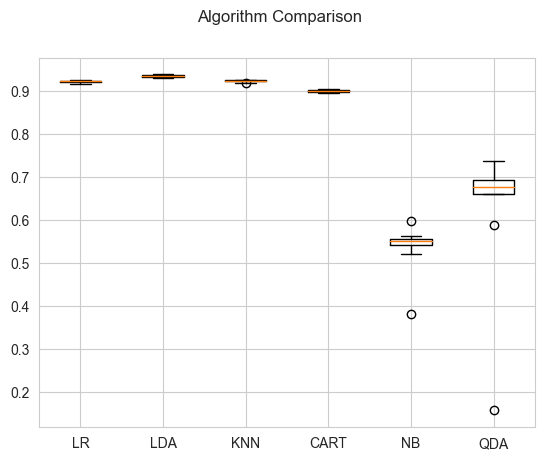

In [53]:
# To Compare Algorithms
# To create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

** Observation **

* Linear Discriminant Analysis acheiving the best accuracy

In [54]:
# Assigning default value as Zero for now to test dataset is_promoted
test['is_promoted'] = 0.0

# Make predictions on test dataset
test_array = test.values
X_test = test_array[:,0:58]
Y_test = test_array[:,58] 

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9693486590038314
[[22770   720]
 [    0     0]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     23490
         1.0       0.00      0.00      0.00         0

    accuracy                           0.97     23490
   macro avg       0.50      0.48      0.49     23490
weighted avg       1.00      0.97      0.98     23490



** Observation **

* Linear Discriminant Analysis accuracy on test dataset: 0.969348659004

In [55]:
#To store the final predicted result for test dataset into sample_submission.csv

sample_submission_lda = emp_df_dummies.loc[(emp_df_dummies.is_test_set == 1), ['employee_id']]
sample_submission_lda['is_promoted'] = list(predictions)

sample_submission_lda.to_csv('sample_submission_lda.csv',index=False)

In [56]:
# To check the number of eligible employees in the predicted test dataset
sample_submission_lda[sample_submission_lda['is_promoted']==1].count()

employee_id    720
is_promoted    720
dtype: int64

** Observation **

* 720 employee promoted from the test dataset as per final prediction


In [57]:
from IPython.display import HTML
import base64 
def create_download_link( data, title = "Download CSV file", filename = "sample_submission_lda.csv"):  
    csv = sample_submission_lda.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(sample_submission_lda)